# 1. 비선형 회귀 예측 모델(Support Vector Regression : Radial Basis Function)

> *이 노트는 [머신러닝과 딥러닝을 활용한 비트코인 가격예측 데이터분석](../upbitAnalyzer_data_analysis_report.ipynb)의 *모델 선택* 과정에서 생성되었습니다.*

- **데이터소스:** BTC/KRW(비트코인 대 한국 원화) - 2022년 9월 17일부터 가장 최근의 일간 조정 종가(Adjusted Close)
- **입력 변수:** 단순 회귀 분석 모델에서는 예측에 사용되는 하나의 독립 변수를 선택합니다. 이 변수는 BTC/KRW 가격에 영향을 미치는 요인으로 선택되며, 주로 경제적인 지표나 기술적 분석 지표로 구성될 수 있습니다.
- **종속 변수:** BTC/KRW 가격으로 설정되며, 이를 예측하는 것이 목표입니다.
- **모델 구조:** 단순 회귀 분석 모델은 선형 회귀 모델로 구성됩니다. 주어진 입력 변수와 BTC/KRW 가격 간의 선형 관계를 모델링하고, 이를 기반으로 예측을 수행합니다.
- **학습 및 예측:** 모델은 학습 데이터를 기반으로 회귀 계수를 추정하고, 이를 사용하여 새로운 데이터에서 BTC/KRW 가격을 예측합니다. 학습은 일반적으로 최소 제곱법 등의 회귀 분석 기법을 사용하여 수행됩니다.
- **모델 평가:** 학습된 모델의 성능은 주로 평균 제곱 오차(Mean Squared Error)나 결정 계수(Coefficient of Determination) 등의 지표를 사용하여 평가됩니다. 이를 통해 모델의 예측 정확도를 평가하고 비교할 수 있습니다.

일반적으로 비트코인 가격 예측을 위해 단순 회귀 분석을 수행하는 것은 일반적으로 좋은 선택이 아닙니다. 비트코인 가격은 시계열 데이터로서 많은 변동성을 가지고 있으며, 비선형적인 패턴을 따르는 경우가 많습니다. 따라서 비트코인 가격 예측에는 시계열 분석 기법 중 하나인 ARIMA(AutoRegressive Integrated Moving Average)나 LSTM(Long Short-Term Memory)과 같은 딥러닝 모델을 사용하는 것이 더 적합합니다.

## 데이터 수집
BTC/KRW(비트코인 대 한국 원화) - 2022년 9월 17일부터 가장 최근의 조정 종가(Adjusted Close)

In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin
from datetime import date, datetime

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2013,1,1)

# BTC(KRW)
yfin.pdr_override()

btc_krwname = 'Bitcoin(KRW)'
btc_krw = 'BTC-KRW'
btc_krw_df = pdr.get_data_yahoo(btc_krw, start=date_start, end=date_today)

print(btc_krw_df.shape)
btc_krw_df

[*********************100%***********************]  1 of 1 completed
(3174, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,4.826118e+05,4.838110e+05,4.681210e+05,4.732035e+05,4.732035e+05,21787470960
2014-09-18,4.727130e+05,4.762765e+05,4.309914e+05,4.428182e+05,4.428182e+05,35976322560
2014-09-19,4.424667e+05,4.475154e+05,4.012784e+05,4.119893e+05,4.119893e+05,39571102935
2014-09-20,4.118610e+05,4.417305e+05,4.068624e+05,4.267118e+05,4.267118e+05,38469009780
2014-09-21,4.258571e+05,4.303872e+05,4.103040e+05,4.161897e+05,4.161897e+05,27737663355
...,...,...,...,...,...,...
2023-05-22,3.593747e+07,3.613293e+07,3.539319e+07,3.545438e+07,3.545438e+07,11459626783399
2023-05-23,3.544918e+07,3.556857e+07,3.510552e+07,3.528741e+07,3.528741e+07,14530586645292
2023-05-24,3.529357e+07,3.598590e+07,3.517012e+07,3.594313e+07,3.594313e+07,18082910616976


### 전처리 및 모델

In [2]:
import pandas as pd

data = pd.DataFrame()
data['Adj Close'] = btc_krw_df['Adj Close']
data

,Adj Close
Date,
2014-09-17,4.732035e+05
2014-09-18,4.428182e+05
2014-09-19,4.119893e+05
2014-09-20,4.267118e+05
2014-09-21,4.161897e+05
...,...
2023-05-22,3.545438e+07
2023-05-23,3.528741e+07
2023-05-24,3.594313e+07


c:\Users\creat\project\time-series-da\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\creat\project\time-series-da\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\creat\project\time-series-da\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\creat\project\time-series-da\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

Mean Squared Error (MSE): 6.973492178043752e-05
Mean Absolute Error (MAE): 0.008319218480909345
R-squared (R2): 0.9999346350197239
SVM Confidence: 1.0


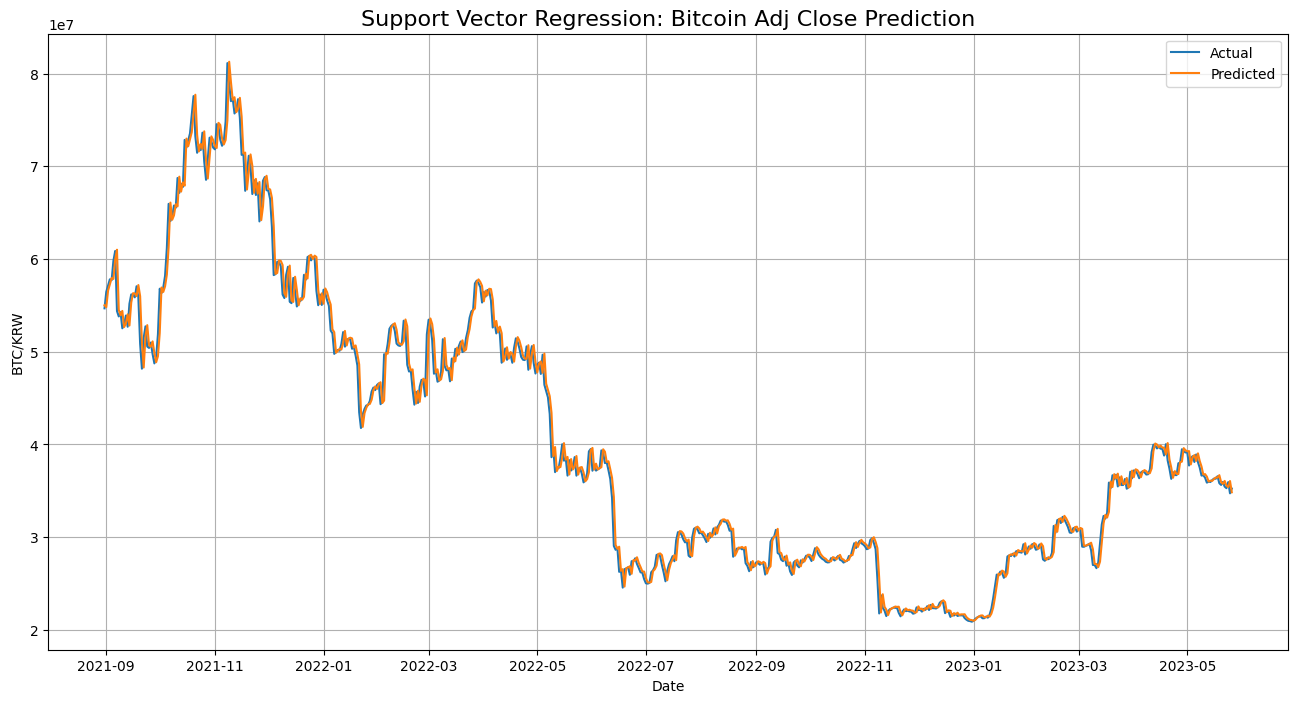

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 데이터 분할
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# 특성(X)과 타겟(y) 분리
X_train, y_train = train_data['Adj Close'][:-1], train_data['Adj Close'][1:]
X_test, y_test = test_data['Adj Close'][:-1], test_data['Adj Close'][1:]

# 표준화 스케일링 수행
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))
y_train_scaled = scaler.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# 결측값 제거
X_train_scaled = X_train_scaled[~np.isnan(X_train_scaled)].reshape(-1, 1)
X_test_scaled = X_test_scaled[~np.isnan(X_test_scaled)].reshape(-1, 1)
y_train_scaled = y_train_scaled[~np.isnan(y_train_scaled)].reshape(-1, 1)
y_test_scaled = y_test_scaled[~np.isnan(y_test_scaled)].reshape(-1, 1)

# SVR 모델 생성
model = SVR()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5)

# 그리드 서치를 통한 하이퍼파라미터 튜닝
grid_search.fit(X_train_scaled, y_train_scaled)

# 최적의 모델 선택
model = grid_search.best_estimator_

# 훈련 데이터에 대한 예측 수행
X_train_pred_scaled = model.predict(X_train_scaled)
X_test_pred_scaled = model.predict(X_test_scaled)

# 정상화에 대한 원상복구
X_train_pred = scaler.inverse_transform(X_train_pred_scaled.reshape(-1, 1))
X_test_pred = scaler.inverse_transform(X_test_pred_scaled.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# 성능 평가
mse = mean_squared_error(X_test_scaled, X_test_pred_scaled)
mae = mean_absolute_error(X_test_scaled, X_test_pred_scaled)
r2 = r2_score(X_test_scaled, X_test_pred_scaled)
confidence = model.score(X_test_scaled, X_test_pred_scaled)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("SVM Confidence:", confidence)

# 시각화
plt.figure(figsize=(16, 8))
plt.plot(data.index[train_size+1:], y_test, label='Actual')
plt.plot(data.index[train_size+1:], X_test_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('BTC/KRW')
plt.legend()
plt.title('Support Vector Regression: Bitcoin Adj Close Prediction', fontsize=16)
plt.grid()
plt.show()

### 에측

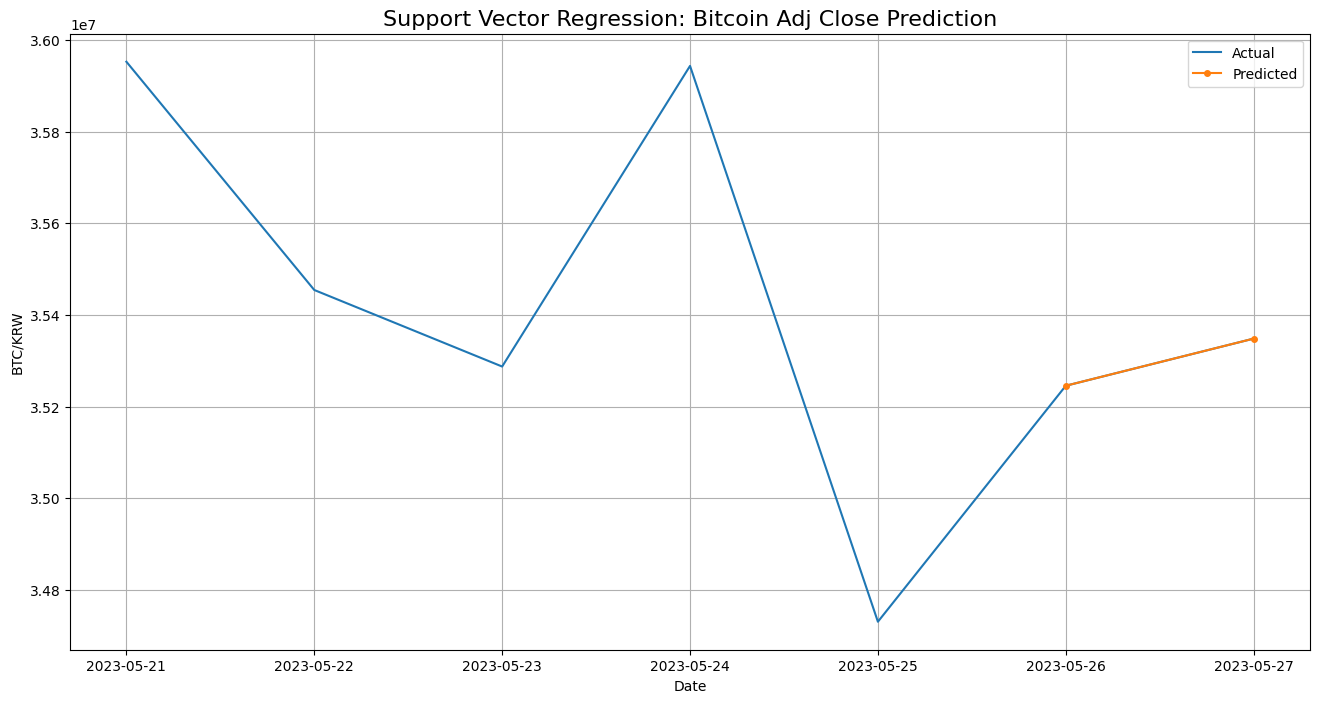

In [125]:
import matplotlib.pyplot as plt

# 다음 날의 미래 가격 예측(과거 60일)
data_scaled = scaler.transform(data['Adj Close'].values.reshape(-1, 1))
last_data = data_scaled[-60].reshape(1, -1)
next_day_pred_scaled = model.predict(last_data)
next_day_pred = scaler.inverse_transform(next_day_pred_scaled.reshape(-1, 1))

prediction_data = pd.DataFrame(next_day_pred, columns=['Adj Close'], index=[data.index[-1] + pd.DateOffset(days=1)])
combined_data = pd.concat([data, prediction_data])

# 시각화: actual and predicted values
plt.figure(figsize=(16, 8))
plt.plot(combined_data.index[-7:], combined_data['Adj Close'][-7:], label='Actual')
plt.plot(combined_data.index[-2:], combined_data['Adj Close'][-2:], marker='o', markersize=4, label='Predicted')
plt.xlabel('Date')
plt.ylabel('BTC/KRW')
plt.legend()
plt.title('Support Vector Regression: Bitcoin Adj Close Prediction', fontsize=16)
plt.grid()
plt.show()


Date
2023-03-28    35232324.0
2023-03-29    35375764.0
2023-03-30    37064312.0
2023-03-31    36356028.0
2023-04-01    37206284.0
2023-04-02    37118164.0
2023-04-03    36841856.0
2023-04-04    36360724.0
2023-04-05    36977236.0
2023-04-06    37116604.0
2023-04-07    36992692.0
2023-04-08    36759868.0
2023-04-09    36791596.0
2023-04-10    37299024.0
2023-04-11    39178424.0
2023-04-12    39984052.0
2023-04-13    39878616.0
2023-04-14    39573656.0
2023-04-15    39764632.0
2023-04-16    39546536.0
2023-04-17    39542696.0
2023-04-18    38804056.0
2023-04-19    40030536.0
2023-04-20    38269604.0
2023-04-21    37396276.0
2023-04-22    36289080.0
2023-04-23    37007568.0
2023-04-24    36707036.0
2023-04-25    36694096.0
2023-04-26    37970484.0
2023-04-27    38035400.0
2023-04-28    39487160.0
2023-04-29    39261964.0
2023-04-30    39139156.0
2023-05-01    39166628.0
2023-05-02    37730208.0
2023-05-03    38507192.0
2023-05-04    38738068.0
2023-05-05    38112156.0
2023-05-06    389249

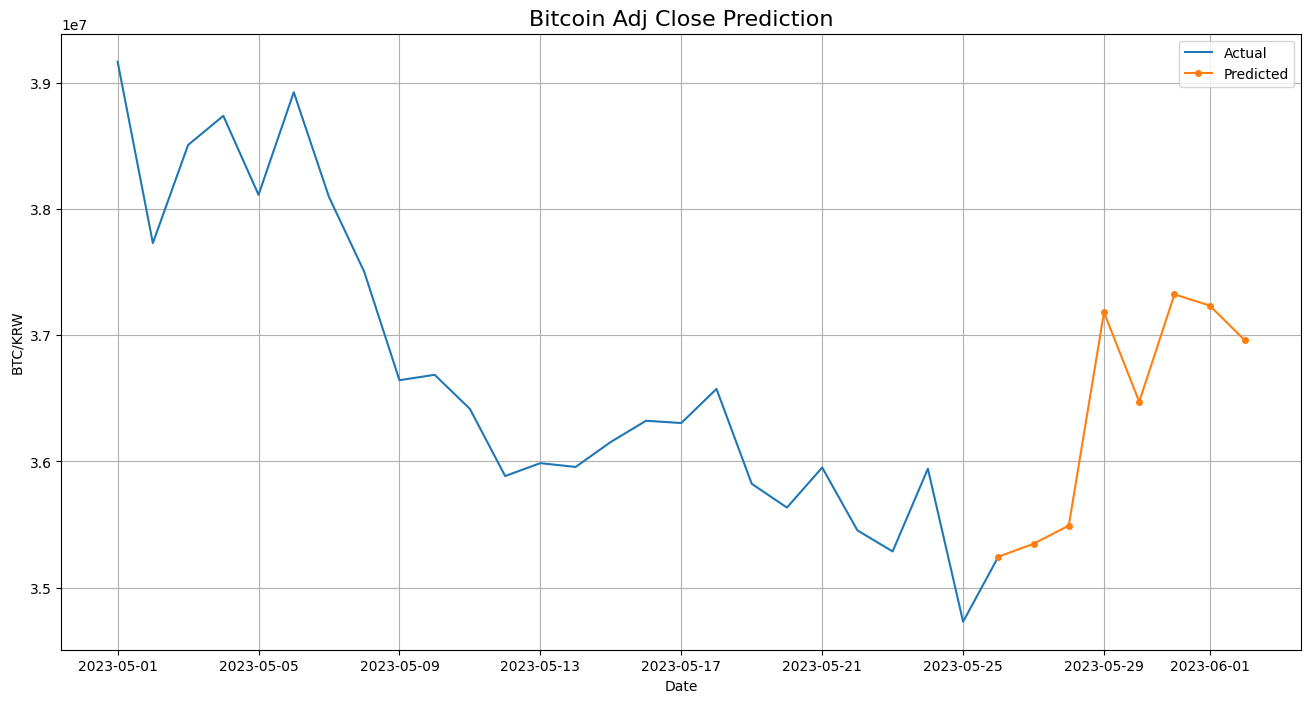

In [139]:
# 슬라이딩 윈도우 사이즈 설정
window_size = 60

# 이전 7일 데이터를 사용하여 다음 하루의 가격 예측
predictions = []
window = data['Adj Close'][-window_size:]
print(window)

for i in range(7):
    window_scaled = scaler.transform(window.values.reshape(-1, 1))
    prediction_scaled = model.predict(window_scaled)
    prediction = scaler.inverse_transform(prediction_scaled.reshape(-1, 1))
    predictions.append(prediction[0, 0])

    # 예측값을 추가하고 윈도우를 이동
    next_day = window.index[-1] + pd.Timedelta(days=1)
    window = pd.concat([window, pd.Series(prediction[0, 0], index=[next_day])]).iloc[1:]

# 예측 결과 출력
print("Predictions for the next 7 days:")
for i, prediction in enumerate(predictions):
    print(f"Day {i+1}: {prediction}")

# 예측 결과를 데이터프레임으로 생성
prediction_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(predictions), freq='D')
prediction_df = pd.DataFrame(predictions, columns=['Adj Close'], index=prediction_dates)
prediction_df = pd.concat([data[-1:], prediction_df])

# 시각화
plt.figure(figsize=(16, 8))
plt.plot(data.loc['2023-05'], label='Actual')
plt.plot(prediction_df.index[-8:], prediction_df['Adj Close'][-8:], marker='o', markersize=4, label='Predicted')
plt.xlabel('Date')
plt.ylabel('BTC/KRW')
plt.legend()
plt.title('Bitcoin Adj Close Prediction', fontsize=16)
plt.grid()
plt.show()